In [18]:
import numpy as np

class DiscreteSHOSimulation():
  def __init__(self, k: float, m: float):
    self.k: float = k
    self.m: float = m
    self.Nt: float | None = None
    self.t_arr: np.ndarray | None = None
    self.a_arr: np.ndarray | None = None
    self.v_arr: np.ndarray | None = None
    self.x_arr: np.ndarray | None = None

  def initialize_storage(self,t0,tf,Nt):
    self.Nt = Nt
    self.t_arr: np.ndarray = np.linspace(t0,tf,Nt)
    self.a_arr: np.ndarray = np.empty_like(self.t_arr)
    self.v_arr: np.ndarray = np.empty_like(self.t_arr)
    self.x_arr: np.ndarray = np.empty_like(self.t_arr)
    self.Epot_arr: np.ndarray = np.empty_like(self.t_arr)
    self.Ekin_arr: np.ndarray = np.empty_like(self.t_arr)

  def calculate_a(self, x):
    a = -self.k/self.m * x
    return a
  
  def calculate_v(self, v, a, dt):
    return v + a * dt
  
  def calculate_x(self, x, v, dt):
    return x + v * dt
  
  def calculate_Epot(self, x):
    return 0.5 * self.k * x**2
  
  def calculate_Ekin(self, v):
    return 0.5 * self.m * v**2

  def simulate(self, t0, tf, v0=0, x0=0, Nt=1000):
    self.initialize_storage(t0,tf,Nt)

    # set initial conditions
    self.dt = self.t_arr[1] - self.t_arr[0]
    self.v_arr[0] = v0
    self.x_arr[0] = x0

    for i in range(self.Nt-1):
      self.a_arr[i] = self.calculate_a(self.x_arr[i])
      self.Ekin_arr[i] = self.calculate_Ekin(self.v_arr[i])
      self.Epot_arr[i] = self.calculate_Epot(self.x_arr[i])

      self.v_arr[i+1] = self.calculate_v(
          v=self.v_arr[i], 
          a=self.a_arr[i],
          dt=self.dt)
      self.x_arr[i+1] = self.calculate_x(
          x=self.x_arr[i],
          v =self.v_arr[i+1],
           dt=self.dt)
      
    
    self.a_arr[Nt-1] = self.calculate_a(self.x_arr[Nt-1])
    self.Ekin_arr[Nt-1] = self.calculate_Ekin(self.v_arr[Nt-1])
    self.Epot_arr[Nt-1] = self.calculate_Epot(self.x_arr[Nt-1])

sho = DiscreteSHOSimulation(k=1, m=1)
sho.simulate(0,10,0,1,1000)


In [19]:
import matplotlib.pyplot as plot

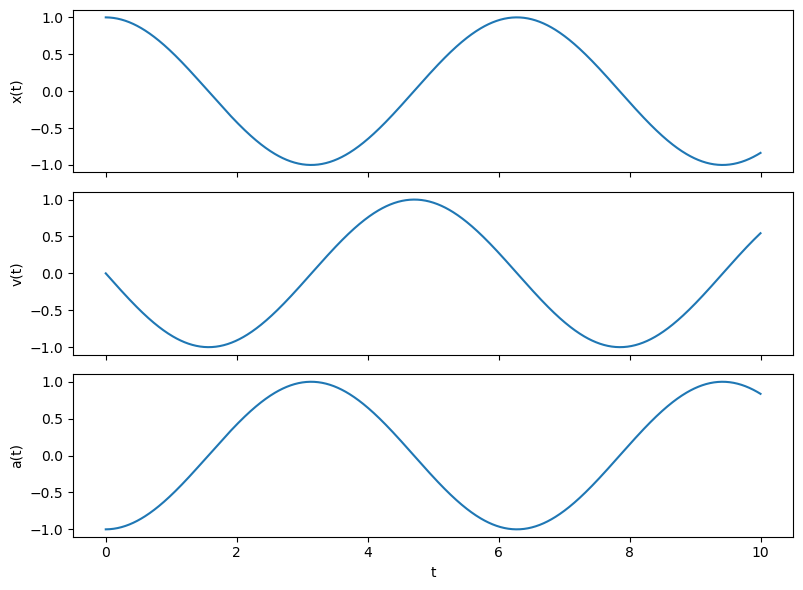

In [20]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8, 6))

axes[0].plot(sho.t_arr, sho.x_arr)
axes[0].set_ylabel("x(t)")

axes[1].plot(sho.t_arr, sho.v_arr)
axes[1].set_ylabel("v(t)")

axes[2].plot(sho.t_arr, sho.a_arr)
axes[2].set_ylabel("a(t)")
axes[2].set_xlabel("t")

plt.tight_layout()
plt.show()


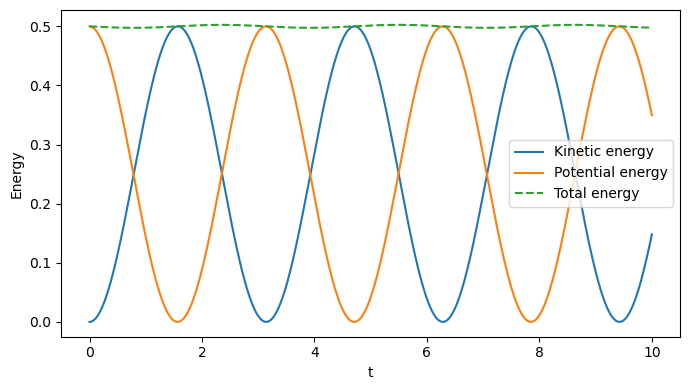

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
plt.plot(sho.t_arr, sho.Ekin_arr, label="Kinetic energy")
plt.plot(sho.t_arr, sho.Epot_arr, label="Potential energy")
plt.plot(sho.t_arr, sho.Ekin_arr + sho.Epot_arr, linestyle="--", label="Total energy")

plt.xlabel("t")
plt.ylabel("Energy")
plt.legend()
plt.tight_layout()
plt.show()
